In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

'Adsız klasör'	    protein_ortak.ipynb
 Classes1.py	    SydneyHousePrices.csv
'Colab Notebooks'   VerilerinIncelenmesi-Oğuzhan.ipynb
 diabetes.csv	    Wine.ipynb
 Hitters.csv	    winemag-data_first150k.csv
 hmelq.csv	   "Wine's Data - PreProcessing.ipynb"
 HW_Data_Set.xlsx


In [44]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Importance da en yararli degiskenleri bulmustuk onlara gore degerlendirme yapacagiz

df = pd.read_csv("/content/drive/My Drive/hmelq.csv")

df.dropna(inplace=True)
df1 = df.copy()

lbe = LabelEncoder()

df1["reason"] = lbe.fit_transform(df1["reason"])
df1  = pd.get_dummies(df1,columns= ["job"], prefix= ["job"])

df1.head(2)

,bad,loan,mortdue,value,reason,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,0


In [56]:
degisken = ["bad","debtinc","delinq","value","loan"]

data = df1.loc[:,degisken]

data.head(2)

,bad,debtinc,delinq,value,loan
153,0,36.056,0.0,136877.0,18200
154,0,38.079,0.0,96784.0,21700


In [57]:
X = data.drop(labels=["bad"],axis=1)
y = data["bad"]

In [58]:
forest = RandomForestClassifier(max_depth = 3, n_estimators=4)
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
estimator = forest.estimators_[3]

In [28]:
target_names = ["borcunu_odedi","borcunu_odemedi"]

In [60]:
from sklearn.tree import export_graphviz

export_graphviz(estimator,out_file="tree_limited.dot",feature_names=X.columns,
                class_names=target_names,rounded = True, proportion = False, precision = 2, filled = True)

In [61]:
forest_1 = RandomForestClassifier(max_depth = None, n_estimators=4)
forest_1 = forest_1.fit(X,y)
estimator_non = forest_1.estimators_[3]

In [62]:
export_graphviz(estimator_non, out_file='tree_nonlimited.dot', feature_names = X.columns,
                class_names = target_names,
                rounded = True, proportion = False, precision = 2, filled = True)

In [63]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

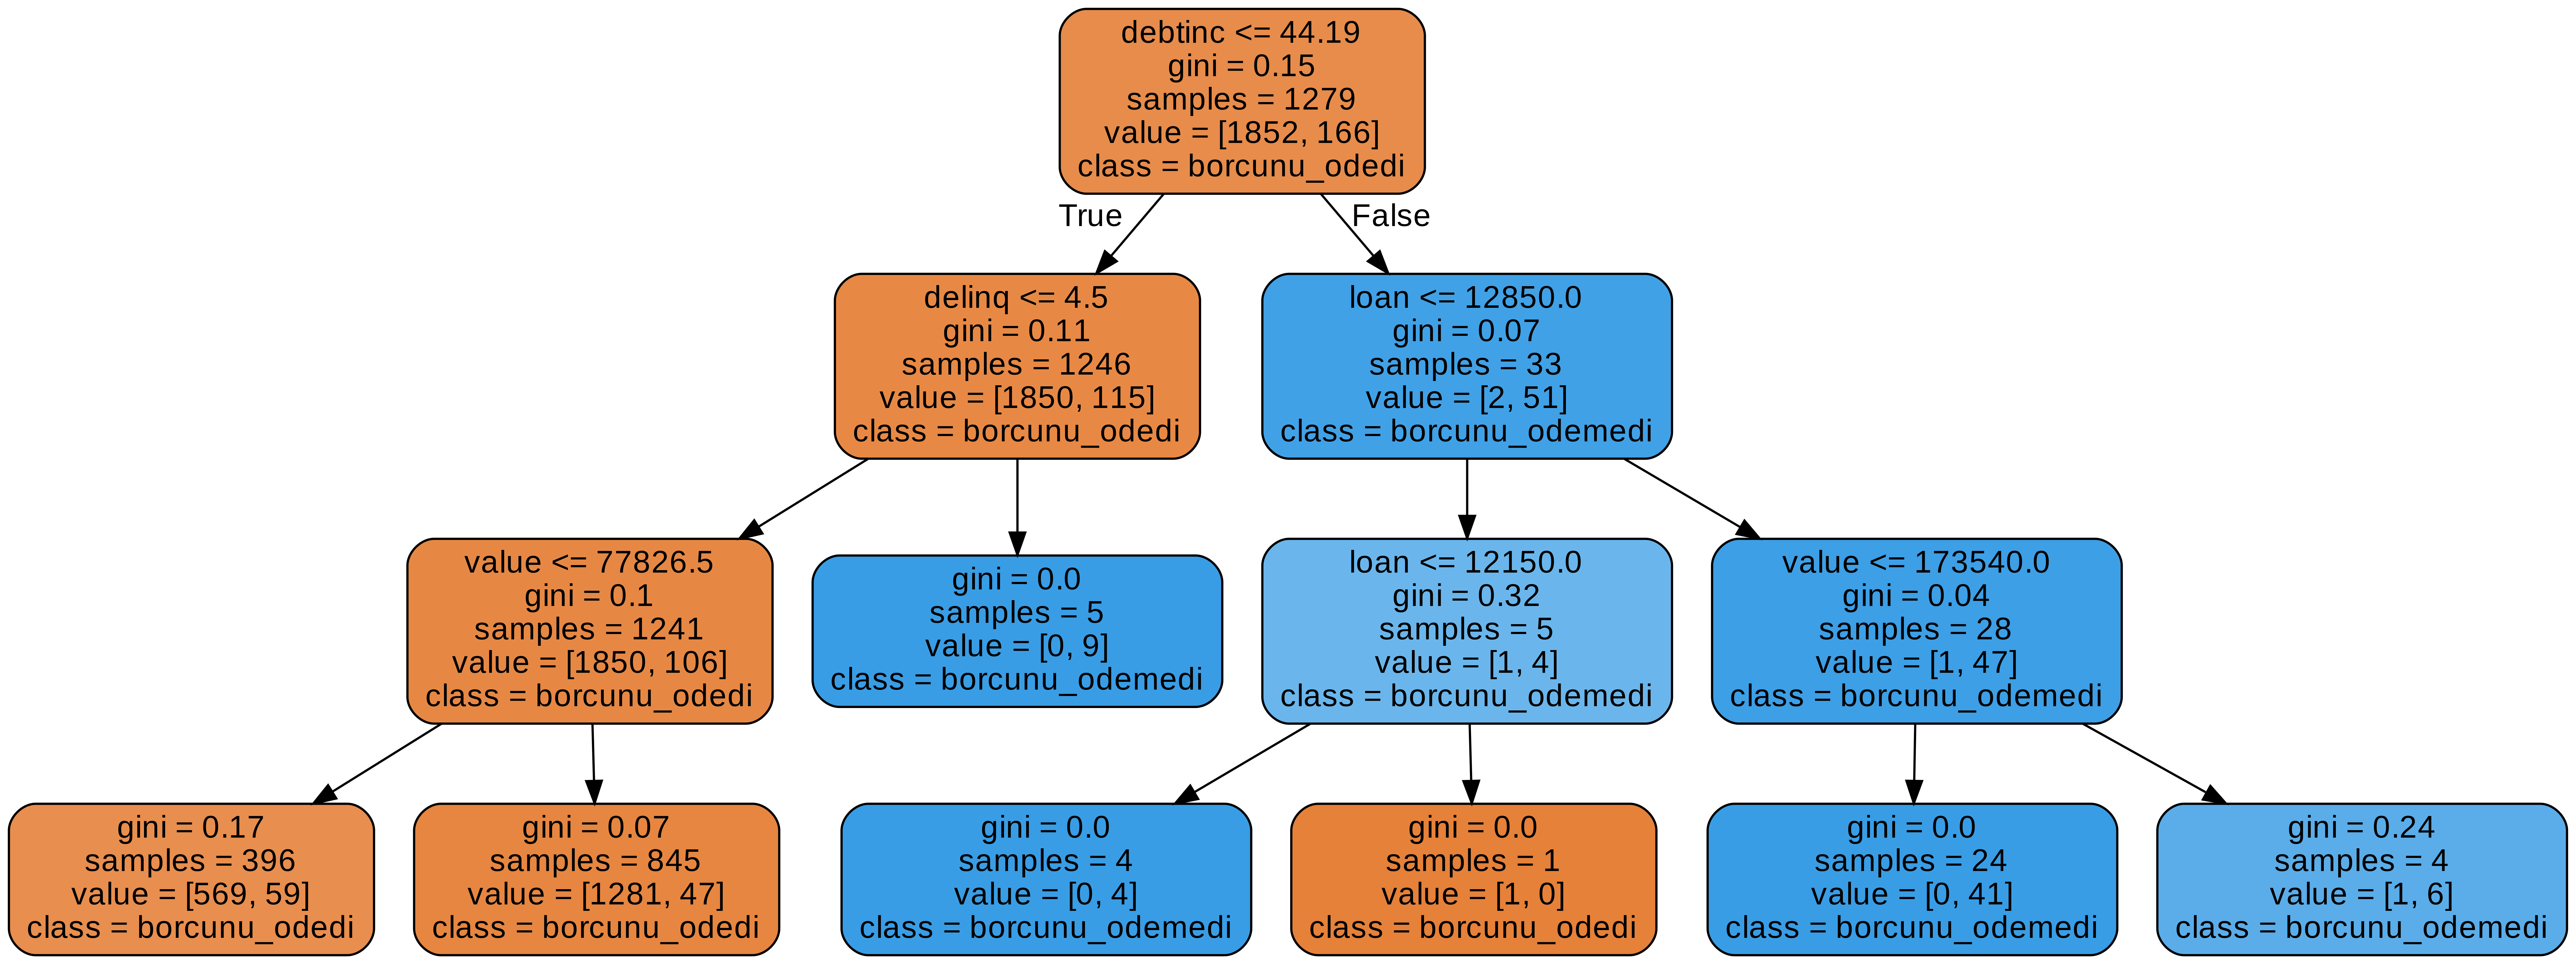

In [64]:
from IPython.display import Image
Image(filename = 'tree_limited.png')